In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = pd.read_csv("./res/homeprices_banglore.csv")
df.sample(5)

,area,bedrooms,price
15,1175,2,42.0
14,2250,3,101.0
17,1540,3,60.0
12,1000,2,38.0
9,3700,5,167.0


In [3]:
from sklearn.preprocessing import MinMaxScaler
sx = MinMaxScaler()
xy = MinMaxScaler()

scaled_x = sx.fit_transform(df.drop(['price'], axis='columns'))

scaled_y = xy.fit_transform(df['price'].values.reshape(df.shape[0], 1))
scaled_x

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [4]:
scaled_y.reshape(20,)

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [5]:
scaled_y

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

In [9]:
def batch_gradient_descent(X, y_true, epochs, rate= 0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features,))
    b = 0
    total_samples = X.shape[0]
    cost_list = []
    epoch_list = []
    for i in range(epochs):
        y_predicted = np.dot(w, X.T) + b
        w_grad = -(2/total_samples)*(X.T.dot(y_true-y_predicted))
        b_grad = -(2/total_samples)*(np.sum(y_true-y_predicted))
        w = w - rate*w_grad
        b = b - rate*b_grad

        cost = np.mean(np.square(y_true-y_predicted))

        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost, cost_list, epoch_list


w, b, cost, cost_list, epoch_list = batch_gradient_descent(scaled_x, scaled_y.reshape(scaled_y.shape[0],), 500)
w, b, cost

(array([0.70712464, 0.67456527]), -0.23034857438407427, 0.0068641890429808105)

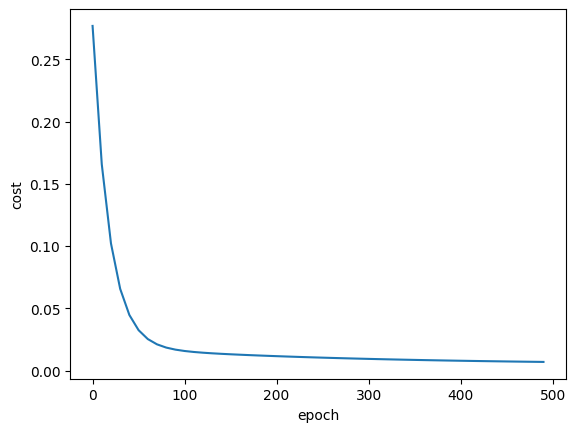

In [10]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(epoch_list, cost_list)

In [20]:
def predict(area, bedrooms, w, b):
    scaled_X = sx.transform([[area, bedrooms]])[0]
    
    scaled_price = w[0]*scaled_X[0]+w[1]*scaled_X[1]+b
    return ( xy.inverse_transform([[scaled_price]])[0][0] )


predict(2600, 4, w, b)

/home/javedjarif/Desktop/workdir/Tensorflow_Keras/env/lib64/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


128.45484403267596

In [21]:
predict(1000, 2, w, b)

/home/javedjarif/Desktop/workdir/Tensorflow_Keras/env/lib64/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


30.253094462442355

In [22]:
import random
random.randint(0,6)

6

In [23]:
scaled_x[4]

array([0.13793103, 0.25      ])

In [24]:
scaled_y[4]

array([0.14074074])

In [52]:
scaled_y.shape

(20, 1)

In [53]:
scaled_y.reshape(scaled_y.shape[0])

array([0.05237037, 0.65185185, 0.22222222, 0.31851852, 0.14074074,
       0.04444444, 0.76296296, 0.91111111, 0.13333333, 1.        ,
       0.37037037, 0.8       , 0.04444444, 0.05925926, 0.51111111,
       0.07407407, 0.11851852, 0.20740741, 0.51851852, 0.        ])

In [68]:
def stochastic_gradient_descent(X, y_true, epochs, rate=0.01):
    number_of_features = X.shape[1]
    w = np.ones(shape=(number_of_features,))
    b = 0
    n = X.shape[0]
    cost_list = []
    epoch_list = []
    cost = 0

    for i in range(epochs):
        rand_idex = random.randint(0, n-1)
        sample_x = X[rand_idex]
        sample_y = y_true[rand_idex]

        y_predicted = np.dot(w, sample_x.T) + b

        w_grad = -(2/n)*(sample_x.T.dot(sample_y-y_predicted))
        #w_grad = -(2/n)*np.dot(sample_x.T, sample_y-y_predicted)
        b_grad = -(2/n)*(sample_y-y_predicted)
        
        w = w-rate*w_grad
        b = b-rate*b_grad
        
        cost = np.mean(np.square(sample_y-y_predicted))

        if i%10 == 0 :
            cost_list.append(cost)
            epoch_list.append(i)

        
    return w, b, cost, cost_list, epoch_list
        


sw, sb, scost, scost_list, sepoch_list = stochastic_gradient_descent(scaled_x,scaled_y.reshape(scaled_y.shape[0]), 1000)

sw, sb, scost

(array([0.86311422, 0.83717849]), -0.2536350195989989, 0.00045623553750465676)

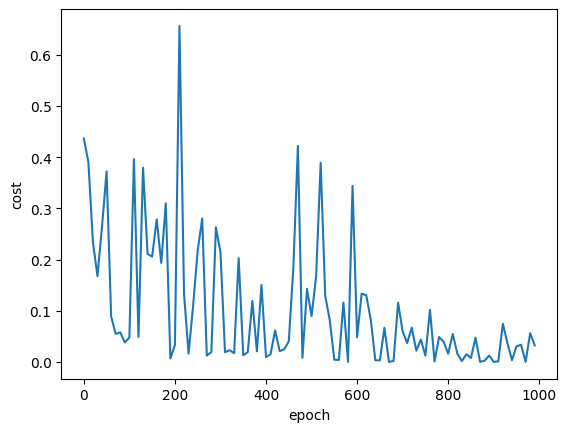

In [69]:
plt.xlabel("epoch")
plt.ylabel("cost")
plt.plot(sepoch_list, scost_list)

In [70]:
predict(2600, 4, sw, sb)

/home/javedjarif/Desktop/workdir/Tensorflow_Keras/env/lib64/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


154.8466139542897

In [71]:
predict(1000, 2, sw, sb)

/home/javedjarif/Desktop/workdir/Tensorflow_Keras/env/lib64/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


34.04993744881697